In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

from PIL import Image

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
negative_images = os.listdir('./concrete_data/train/Negative')
negative_images.sort()

In [4]:
negative_images_dir = ['./.concrete_data/train/Negative/{}'.format(image) for image in negative_images]
negative_images_dir

['./.concrete_data/train/Negative/00001.jpg',
 './.concrete_data/train/Negative/00002.jpg',
 './.concrete_data/train/Negative/00003.jpg',
 './.concrete_data/train/Negative/00004.jpg',
 './.concrete_data/train/Negative/00005.jpg',
 './.concrete_data/train/Negative/00006.jpg',
 './.concrete_data/train/Negative/00007.jpg',
 './.concrete_data/train/Negative/00008.jpg',
 './.concrete_data/train/Negative/00009.jpg',
 './.concrete_data/train/Negative/00010.jpg',
 './.concrete_data/train/Negative/00011.jpg',
 './.concrete_data/train/Negative/00012.jpg',
 './.concrete_data/train/Negative/00013.jpg',
 './.concrete_data/train/Negative/00014.jpg',
 './.concrete_data/train/Negative/00015.jpg',
 './.concrete_data/train/Negative/00016.jpg',
 './.concrete_data/train/Negative/00017.jpg',
 './.concrete_data/train/Negative/00018.jpg',
 './.concrete_data/train/Negative/00019.jpg',
 './.concrete_data/train/Negative/00020.jpg',
 './.concrete_data/train/Negative/00021.jpg',
 './.concrete_data/train/Negative/

In [5]:
positive_images = os.listdir('./concrete_data/train/Positive')
positive_images.sort()

In [6]:
positive_images_dir = ['./concrete_data/train/Positive/{}'.format(image) for image in positive_images]
positive_images_dir

['./concrete_data/train/Positive/00001.jpg',
 './concrete_data/train/Positive/00002.jpg',
 './concrete_data/train/Positive/00003.jpg',
 './concrete_data/train/Positive/00004.jpg',
 './concrete_data/train/Positive/00005.jpg',
 './concrete_data/train/Positive/00006.jpg',
 './concrete_data/train/Positive/00007.jpg',
 './concrete_data/train/Positive/00008.jpg',
 './concrete_data/train/Positive/00009.jpg',
 './concrete_data/train/Positive/00010.jpg',
 './concrete_data/train/Positive/00011.jpg',
 './concrete_data/train/Positive/00012.jpg',
 './concrete_data/train/Positive/00013.jpg',
 './concrete_data/train/Positive/00014.jpg',
 './concrete_data/train/Positive/00015.jpg',
 './concrete_data/train/Positive/00016.jpg',
 './concrete_data/train/Positive/00017.jpg',
 './concrete_data/train/Positive/00018.jpg',
 './concrete_data/train/Positive/00019.jpg',
 './concrete_data/train/Positive/00020.jpg',
 './concrete_data/train/Positive/00021.jpg',
 './concrete_data/train/Positive/00022.jpg',
 './concre

In [7]:
dataset_dir = './concrete_data/train'

In [8]:
# instantiate your image data generator
data_generator = ImageDataGenerator()

In [9]:
image_generator = data_generator.flow_from_directory(
    dataset_dir,
    batch_size=4,
    class_mode='categorical',
    seed=24
)

Found 40000 images belonging to 2 classes.


In [10]:
first_batch_images = image_generator.next()[0]
first_batch_images

array([[[[151., 149., 150.],
         [153., 151., 152.],
         [155., 153., 154.],
         ...,
         [153., 149., 148.],
         [153., 149., 148.],
         [153., 149., 148.]],

        [[152., 150., 151.],
         [154., 152., 153.],
         [156., 154., 155.],
         ...,
         [154., 150., 149.],
         [154., 150., 149.],
         [154., 150., 149.]],

        [[153., 151., 152.],
         [155., 153., 154.],
         [156., 154., 155.],
         ...,
         [156., 152., 151.],
         [156., 152., 151.],
         [156., 152., 151.]],

        ...,

        [[142., 140., 143.],
         [142., 140., 143.],
         [142., 140., 143.],
         ...,
         [139., 135., 136.],
         [142., 138., 139.],
         [145., 141., 142.]],

        [[142., 140., 143.],
         [142., 140., 143.],
         [142., 140., 143.],
         ...,
         [140., 136., 137.],
         [142., 138., 139.],
         [146., 142., 143.]],

        [[142., 140., 143.],
       

In [11]:
data_generator = ImageDataGenerator(
    rescale=1./255
)

image_generator = data_generator.flow_from_directory(
    dataset_dir,
    batch_size=4,
    class_mode='categorical',
    seed=24
)

Found 40000 images belonging to 2 classes.


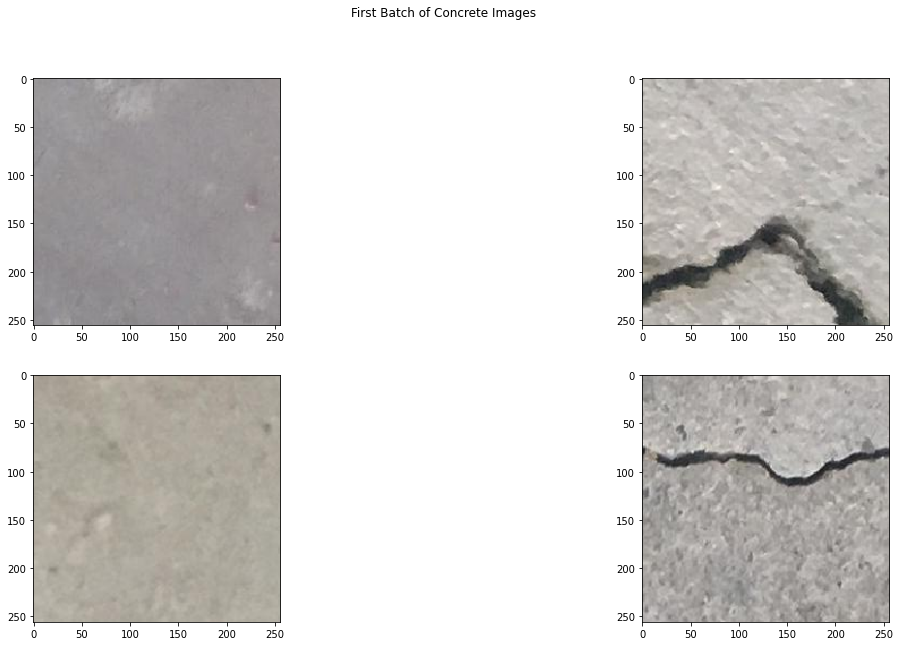

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = first_batch_images[ind].astype(np.uint8)
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('First Batch of Concrete Images') 
plt.show()

In [13]:
num_classes = 2

image_resize = 224

batch_size_training = 100
batch_size_validation = 100

In [14]:
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

In [15]:
train_generator = data_generator.flow_from_directory(
    'concrete_data/train',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

Found 40000 images belonging to 2 classes.


In [16]:
validation_generator = data_generator.flow_from_directory(
    'concrete_data/validation',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_validation,
    class_mode='categorical')

Found 7243 images belonging to 2 classes.


In [17]:
model = Sequential()

In [18]:
model.add(VGG16(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

In [19]:
model.add(Dense(num_classes, activation='softmax'))

In [20]:
model.layers

In [21]:
model.layers[0].trainable = False

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense (Dense)               (None, 2)                 1026      
                                                                 
Total params: 14715714 (56.14 MB)
Trainable params: 1026 (4.01 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)
num_epochs = 2

In [25]:
fit_history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

C:\Users\user\AppData\Local\Temp/ipykernel_3912/251737888.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fit_history = model.fit_generator(


Epoch 1/2


400/400 [==============================] - 4614s 12s/step - loss: 0.1499 - accuracy: 0.9631 - val_loss: 0.0303 - val_accuracy: 0.9931
Epoch 2/2
400/400 [==============================] - 5627s 14s/step - loss: 0.0249 - accuracy: 0.9949 - val_loss: 0.0170 - val_accuracy: 0.9957


In [26]:
model.save('classifier_vgg16_model.h5')

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
